In [8]:
# -*- encoding:urf-8 -*-
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table like and matrices
import pandas as pd
import numpy as np

# Modeling Helper
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

train_path = 'train.csv'
test_path = 'test.csv'
train = pd.read_csv(train_path,encoding='gbk',engine='python')
test = pd.read_csv(test_path)

### Helper Functions

In [3]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [4]:
train.head()

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,Standard,CumType,Unit,SaleNum,SalePrice,UnitPrice,Coupon
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,4.0,2.0,0.0
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,0.0
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,0.0
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,0.0
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,0.0


In [5]:
describe_more(train)

,Datatype,Levels,Variable
16,float64,3,Coupon
11,object,4,CumType
8,int64,4,SaleMonth
1,int64,15,BigCode
2,object,15,BigName
12,object,59,Unit
7,int64,116,SaleDate
4,object,176,MidName
3,int64,178,MidCode
15,float64,457,UnitPrice


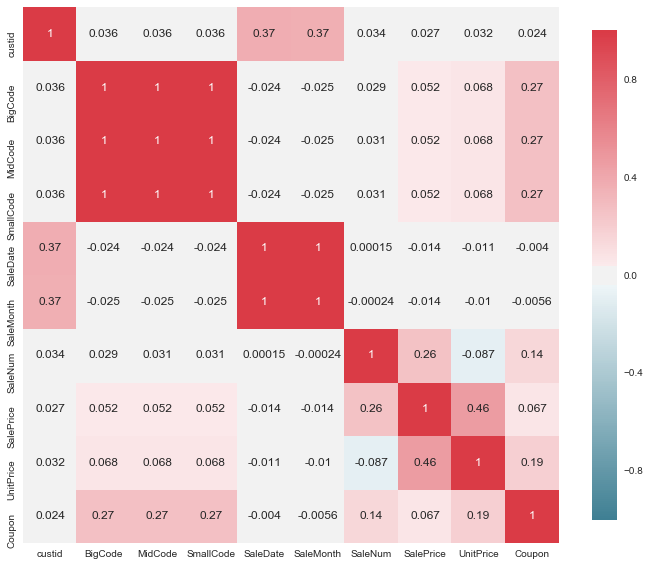

In [6]:
plot_correlation_map(train)

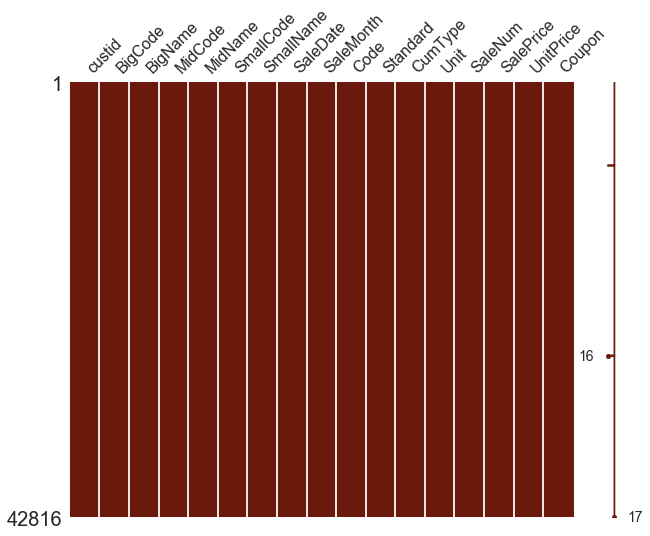

In [7]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train.iloc[:,:], figsize=(10, 8), color=(0.42, 0.1, 0.05))

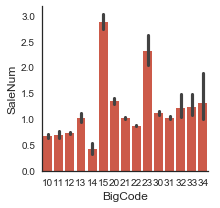

In [8]:
plot_categories( train , cat = 'BigCode' , target = 'SaleNum' )

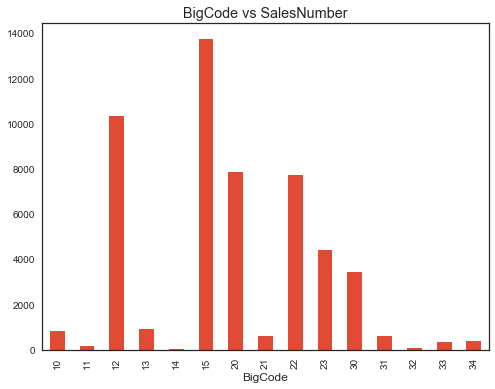

In [9]:
var = train.groupby('BigCode')['SaleNum'].sum()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('BigCode vs SalesNumber')
var.plot(kind='bar')
plt.show()

In [10]:
test.Code.unique()

array([1001, 1002, 1004, 1005, 1099, 1101, 1102, 1103, 1201, 1202, 1203,
       1205, 1301, 1302, 1306, 1308, 1501, 1502, 1503, 1504, 1505, 1507,
       1508, 1510, 1511, 1512, 1513, 1515, 1516, 1517, 1518, 1519, 1521,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2101, 2102, 2103, 2104, 2105, 2106, 2107,
       2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211,
       2212, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2309, 2310, 2311,
       2312, 2313, 2314, 2316, 2317, 3001, 3002, 3003, 3004, 3005, 3006,
       3007, 3008, 3010, 3011, 3013, 3014, 3016, 3017, 3018, 3102, 3105,
       3107, 3109, 3110, 3112, 3113, 3114, 3116, 3117, 3118, 3119, 3125,
       3126, 3208, 3217, 3227, 3311, 3316, 3319, 3320, 3321, 3322, 3323,
       3325, 3326, 3402, 3403, 3407, 3408, 3413, 3415, 3417, 3423, 3424,
       3426, 3431,   10,   11,   12,   13,   15,   20,   21,   22,   23,
         30,   31,   32,   33,   34], dtype=int64)

In [11]:
train.MidCode.unique()

array([1201, 2014, 1505, 1503, 3018, 2001, 1308, 2203, 2201, 1521, 1301,
       2011, 1004, 3119, 3412, 2206, 2013, 1518, 3008, 2007, 1203, 1403,
       3010, 2002, 2006, 3117, 1302, 2209, 1001, 3007, 2105, 3319, 2207,
       3016, 3011, 1202, 2009, 1515, 2205, 2204, 1101, 3321, 1205, 3006,
       3118, 2202, 2208, 3013, 2307, 2101, 3227, 2005, 2008, 2306, 2304,
       2302, 1103, 2316, 1508, 1501, 3002, 2303, 2305, 2103, 2309, 2312,
       2104, 1517, 2314, 2003, 2212, 2210, 2301, 2010, 3017, 3322, 2015,
       3116, 1510, 2107, 2317, 3432, 1512, 2211, 1513, 1511, 3213, 1519,
       3303, 2102, 3320, 2310, 3001, 3402, 3408, 1005, 3114, 3112, 2012,
       3217, 3012, 1002, 3122, 2106, 3102, 3314, 3409, 3403, 2311, 3113,
       3215, 3125, 1007, 3415, 1102, 3110, 1504, 3105, 3121, 3106, 3315,
       3316, 1006, 3323, 3212, 3436, 3426, 2313, 1306, 3009, 3407, 3126,
       3003, 3109, 3111, 3014, 3108, 1502, 1099, 3313, 3218, 3431, 3406,
       3015, 3325, 3410, 3427, 3417, 3004, 3104, 31

In [12]:
train.BigCode.sort_values().unique()

array([10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 30, 31, 32, 33, 34], dtype=int64)

In [13]:
train.head()

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,Standard,CumType,Unit,SaleNum,SalePrice,UnitPrice,Coupon
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,4.0,2.0,0.0
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,0.0
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,0.0
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,0.0
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,0.0


In [14]:
test.head()

,Code,SaleDate,SaleNum
0,1001,20150501,1
1,1001,20150502,1
2,1001,20150503,1
3,1001,20150504,1
4,1001,20150505,1


https://www.leiphone.com/news/201703/6rVkgxvxUumnv5mm.html
https://zhuanlan.zhihu.com/p/26177617

In [15]:
train

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,Standard,CumType,Unit,SaleNum,SalePrice,UnitPrice,Coupon
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.000,4.00,2.00,0.0
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,0.0
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,0.0
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,0.0
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,0.0
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,20150101,201501,DW-3018020109,10片,一般商品,包,1.000,8.90,8.90,0.0
6,6,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040022,散称,生鲜,千克,0.964,8.07,5.60,0.0
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,20150101,201501,DW-2001010062,120g,一般商品,袋,1.000,2.50,3.00,0.0
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,20150101,201501,DW-1308030035,个,生鲜,个,2.000,2.00,1.00,0.0
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,20150101,201501,DW-2203020029,45g,一般商品,袋,1.000,4.00,4.00,0.0


In [16]:
train[train['Coupon'] == 1.0]

,custid,BigCode,BigName,MidCode,MidName,SmallCode,SmallName,SaleDate,SaleMonth,Code,Standard,CumType,Unit,SaleNum,SalePrice,UnitPrice,Coupon
18,7,34,针织,3412,毯子,341206,双人电热毯,20150101,201501,DW-3412060037,150*120,一般商品,条,1.000,79.00,90.0,1.0
19,17,22,休闲,2201,饼干,220110,简装/压缩,20150101,201501,DW-2201100015,散称,一般商品,KG,0.198,2.70,19.8,1.0
22,19,15,日配,1518,常温乳品,151805,利乐枕纯奶,20150101,201501,DW-1518050007,240ml,一般商品,袋,16.000,33.90,2.7,1.0
27,20,20,粮油,2007,南北干货,200701,木耳,20150101,201501,DW-2007010021,散称,一般商品,kg,0.132,8.28,89.8,1.0
34,23,20,粮油,2002,袋装速食面组,200202,猪肉口味,20150101,201501,DW-2002020017,119g*5,一般商品,组,1.000,10.90,14.7,1.0
42,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,20150101,201501,DW-3018020125,4片,一般商品,包,1.000,7.50,8.7,1.0
46,30,22,休闲,2209,巧克力,220906,果仁巧克力,20150101,201501,DW-2209060042,243g,一般商品,碗,1.000,28.30,39.8,1.0
49,32,30,洗化,3007,洗浴用品,300701,香皂,20150101,201501,DW-3007010253,115g,一般商品,块,1.000,3.90,4.7,1.0
63,12,20,粮油,2007,南北干货,200706,红枣,20150101,201501,DW-2007060065,散称,一般商品,kg,0.366,7.23,37.8,1.0
65,40,15,日配,1505,冷藏乳品,150506,冷藏原味鲜乳,20150101,201501,DW-1505060016,100g*8,一般商品,盒,1.000,7.90,12.8,1.0


In [3]:
train['SaleMonth'].unique()

array([201501, 201502, 201503, 201504], dtype=int64)

In [5]:
test['SaleDate'].unique()

array([20150501, 20150502, 20150503, 20150504, 20150505, 20150506,
       20150507, 20150508, 20150509, 20150510, 20150511, 20150512,
       20150513, 20150514, 20150515, 20150516, 20150517, 20150518,
       20150519, 20150520, 20150521, 20150522, 20150523, 20150524,
       20150525, 20150526, 20150527, 20150528, 20150529, 20150530], dtype=int64)

In [6]:
test['Code'].unique()

array([1001, 1002, 1004, 1005, 1099, 1101, 1102, 1103, 1201, 1202, 1203,
       1205, 1301, 1302, 1306, 1308, 1501, 1502, 1503, 1504, 1505, 1507,
       1508, 1510, 1511, 1512, 1513, 1515, 1516, 1517, 1518, 1519, 1521,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2101, 2102, 2103, 2104, 2105, 2106, 2107,
       2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211,
       2212, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2309, 2310, 2311,
       2312, 2313, 2314, 2316, 2317, 3001, 3002, 3003, 3004, 3005, 3006,
       3007, 3008, 3010, 3011, 3013, 3014, 3016, 3017, 3018, 3102, 3105,
       3107, 3109, 3110, 3112, 3113, 3114, 3116, 3117, 3118, 3119, 3125,
       3126, 3208, 3217, 3227, 3311, 3316, 3319, 3320, 3321, 3322, 3323,
       3325, 3326, 3402, 3403, 3407, 3408, 3413, 3415, 3417, 3423, 3424,
       3426, 3431,   10,   11,   12,   13,   15,   20,   21,   22,   23,
         30,   31,   32,   33,   34], dtype=int64)

In [14]:
train['CumType'].value_counts()

一般商品     26070
生鲜       16195
联营商品       549
12g*8        2
Name: CumType, dtype: int64